# 주요 제품 및 서비스 전처리 & 시각화

데이터 출처 : 2023 삼성전자 사업보고서

1. 매출액을 int형으로 저장, 비중은 float형태로 저장(이때 세모는 마이너스를 의미)

2. x축은 부문, y축은 매출액을 나타내는 histplot을 그리시오.(이때 각 부문별 bar의 색은 아르며 각 수치가 bar위에 적혀야 함.)

3. 비중은 원형 그래프로 시각화

In [11]:
import pandas as pd

df_raw = pd.read_csv("data/주요 제품 및 서비스.csv")
df_raw

,부 문,주요 제품,매출액,비중
0,DX 부문,"TV, 모니터, 냉장고, 세탁기, 에어컨,스마트폰, 네트워크시스템, 컴퓨터 등","1,699,923",65.7%
1,DS 부문,"DRAM, NAND Flash, 모바일AP 등","665,945",25.7%
2,SDC,스마트폰용 OLED패널 등,"309,754",12.0%
3,Harman,"디지털 콕핏, 카오디오, 포터블 스피커 등","143,885",5.6%
4,기타,부문간 내부거래 제거 등,"△230,152",△9.0%
5,총 계,총 계,"2,589,355",100.0%


### 1. 전처리 : 매출액 int, 비중 float, 세모 -

In [6]:
import re

def preprocess(sample):
    sample["매출액"] = int(re.sub('△', '-', re.sub(',', '', sample["매출액"])))
    sample["비중"] = float(re.sub('△', '-', re.sub('%', '', sample["비중"])))

    return sample
     
df = df_raw.apply(preprocess, axis=1)
df

,부 문,주요 제품,매출액,비중
0,DX 부문,"TV, 모니터, 냉장고, 세탁기, 에어컨,스마트폰, 네트워크시스템, 컴퓨터 등",1699923,65.7
1,DS 부문,"DRAM, NAND Flash, 모바일AP 등",665945,25.7
2,SDC,스마트폰용 OLED패널 등,309754,12.0
3,Harman,"디지털 콕핏, 카오디오, 포터블 스피커 등",143885,5.6
4,기타,부문간 내부거래 제거 등,-230152,-9.0
5,총 계,총 계,2589355,100.0


### 2. 시각화 : 각 부문별 매출액 histplot 그리기



In [14]:
## seaborn 한국어 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

font_list = [font.name for font in fm.fontManager.ttflist]
print(font_list)

plt.rcParams['font.family'] = 'Jalnan 2 TTF'


['DejaVu Serif', 'STIXSizeFourSym', 'cmtt10', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans Mono', 'cmb10', 'DejaVu Sans Display', 'DejaVu Serif', 'STIXSizeOneSym', 'cmr10', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'DejaVu Serif', 'STIXSizeFiveSym', 'DejaVu Sans', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeFourSym', 'STIXNonUnicode', 'STIXGeneral', 'STIXGeneral', 'STIXSizeTwoSym', 'cmex10', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Serif', 'cmss10', 'DejaVu Sans Mono', 'DejaVu Sans Mono', 'cmmi10', 'DejaVu Serif Display', 'DejaVu Sans', 'STIXSizeOneSym', 'cmsy10', 'MV Boli', 'Segoe UI', 'Lucida Sans Unicode', 'Calibri', 'SimSun', 'HCR Batang ExtB', 'Century', 'Mongolian Baiti', 'Franklin Gothic Book', 'Copperplate Gothic Bold', 'Bookman Old Style', 'MingLiU-ExtB', 'Lucida Sans', 'AlternateGothic2 BT', 'Lucida Bright', 'Trebuchet MS', 'Yu Gothic', 'Lucida Sans Typewriter', 'Jalnan 2 TTF', 'Headline R', 'Centaur', 'Candara', 'Gill Sans MT

C:\Users\tjsgh\AppData\Local\Temp\ipykernel_8408\2215391087.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=x, y=y, palette='Set2')


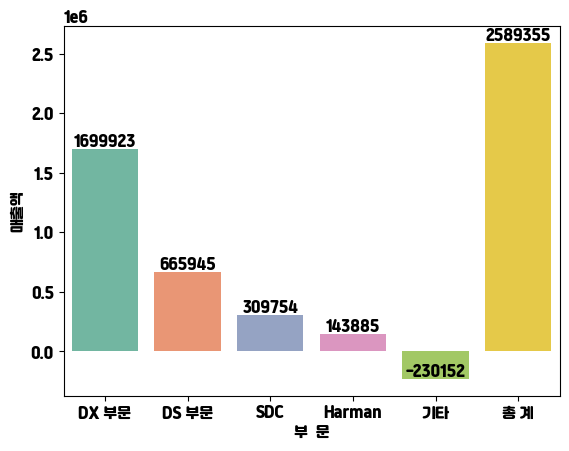

In [37]:
import seaborn as sns
import matplotlib.pylab as plt

keys = df.keys()

x = df[keys[0]]
y = df[keys[2]]

sns.barplot(data=df, x=x, y=y, palette='Set2')


for idx, value in enumerate(y): 
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.show()

### 시각화 : 비중 원 그래프 그리기

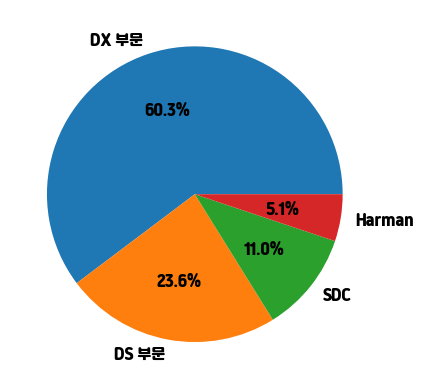

In [34]:
x = df[keys[0]][:-2]
y = df[keys[3]][:-2]

plt.pie(y, labels=x, autopct='%.1f%%')
plt.show()